## Loading the data

In [3]:
#%matplotlib qt

import xupy as xp
import utils as ut
import processing as p
import grasp
stats = grasp.stats
from matplotlib.pyplot import *
import astropy.units as u

tns = {
    '200mas_360_ron': '20251008_155310',
    '500mas_90': '20251001_154655',
    '200mas_90': '20251001_115908',
    '200mas_45': '20250929_160852',
}

cal_psf = ut.load_psf(f"{ut.simpath}/observations/{tns['200mas_90']}/calibration.fits")
cube = ut.load_psf_cube(tns['200mas_90'])

## Image Parameter Determination

### Harmonic decomposition of the reduced Chi-squared:

$$ \ln{\chi^2_{red}(\varphi)} \simeq c_0 + c_2 \cos{2\varphi} + s_2 \sin{2\varphi} \quad ; \quad \text{k=2 term dominant for binaries} $$

 - `ipd_gof_harmonic_amplitude` : $ \sqrt{c_2^2 + s_2^2} $

 - `ipd_gof_harmonic_phase` : $ \mathcal{arctan2}\bigg(\dfrac{s_2}{c_2}\bigg) $

(0.25874226427061486, 64.99635182814706)

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


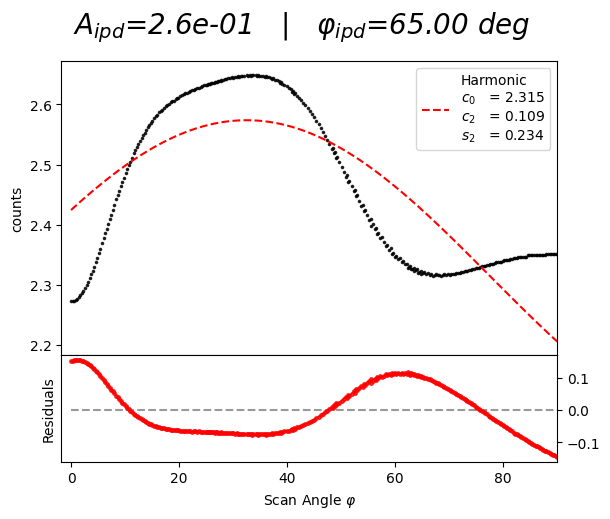

In [4]:
p.ipd_gof_harmonic(cube, cal_psf, show=True)

### Multi-Peak detection

Defined as the fraciton of succesful transit with multi-peaks detected on the psf

In [ ]:
from ipywidgets import interact, widgets

def interactive_plot(index):
    clf()  # Clear the current figure
    # Call your modified plotting function (without show=True)
    maxima = p.find_local_maxima(cube[index], which='al', show=False)
    # If needed, add plt.title(f"Data {index}") or other customizations
    plot(cube[index].psf_x, label='PSF')
    scatter(*zip(*maxima), color='red', label='Maxima')
    legend()
    title(r'Local Maxima in PSF | $\varphi$='+f"{cube[index].phi:.2f}")
    xlabel('Pixel')
    ylabel('Intensity')
    grid()
    draw()  # Update the display

interact(interactive_plot, index=widgets.IntSlider(min=0, max=len(cube)-1, step=1, value=0, description='Data Index:'))

interactive(children=(IntSlider(value=0, description='Data Index:', max=1231), Output()), _dom_classes=('widge…

<function __main__.interactive_plot(index)>

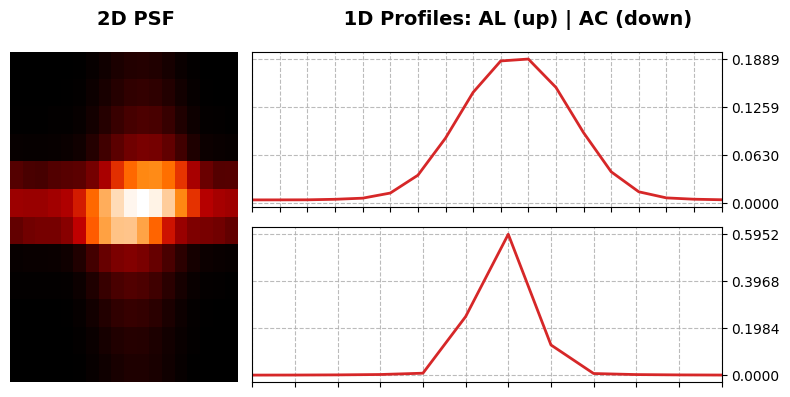

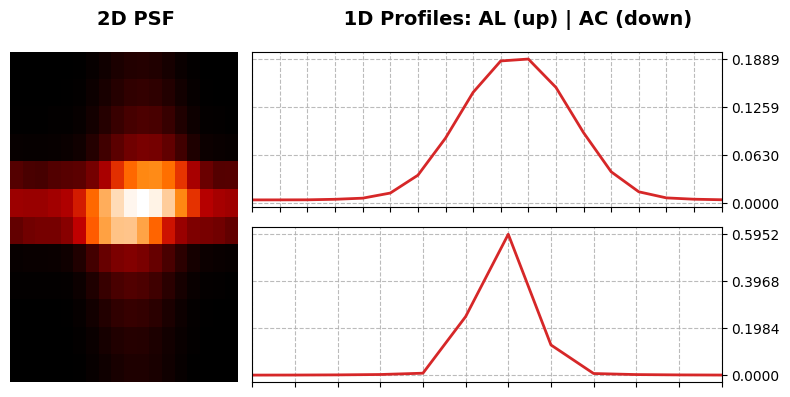

In [5]:
ut.display_psf(cube[171].psf_2d, mode='all', save='psf_171_hr')

In [8]:
imp = p.ipd_frac_multipeak(cube, show=False)

In [6]:
maxima = []
phis = []
for img in cube:
    maxs = p.find_local_maxima(img)
    maxima.append(maxs)
    phis.append(img.phi)

maxima[0]

[(9, 0.13818851), (11, 0.13724136)]

Text(0.5, 1.0, 'Identified Maxima across Scan Angles')

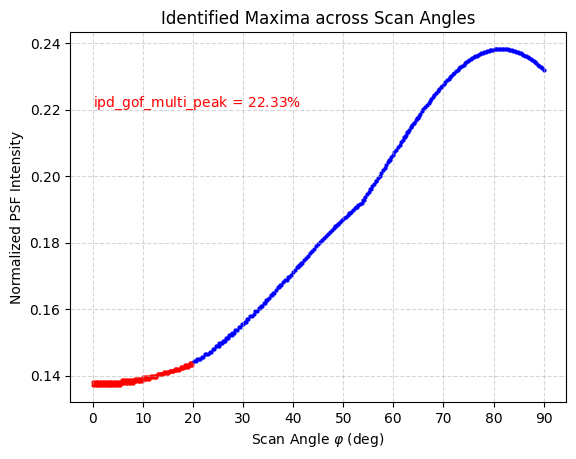

In [9]:
figure()
grid(alpha=0.5, linestyle='--')
for max,phi in zip(maxima, phis):
    scatter([phi]*len(max), [m[1] for m in max], color='red' if len(max) > 1 else 'blue', s=4)
text(0,0.221, r'$\mathrm{ipd\_gof\_multi\_peak}$'+f' = {imp*100:.2f}%', color='red')
xlabel(r'Scan Angle $\varphi$ (deg)')
ylabel('Normalized PSF Intensity')
yticks(np.arange(0.14, 0.25, 0.02))
xticks(np.arange(0, 91, 10))
title('Identified Maxima across Scan Angles')